In [179]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [180]:
#loading the data

df = pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [181]:
df.shape #returns the no. of rows and columns in our dataset

(6745, 6)

In [182]:
df.columns  #returns the features of our dataset

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [183]:
df.dtypes #returns data type of each column

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [184]:
df.isnull().sum() #returns the total no. of missing values in each column

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [185]:
round(100*(df.isnull().sum()/len(df.index)),2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

- from above we can see that there is almost 39% of data missing from column driver id and 58% from drop timestamp.
- we can clearly observe that driver id is a unique feature and for our analysis there would be no use of both of them, so in this project there is no need of missing value treatment

In [186]:
df.head(2) 

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47


In [187]:
df['Date_and_Time']=pd.to_datetime(df['Request timestamp']) 

#converts the column to date time format

In [188]:
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Date_and_Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00


In [189]:
time_of_booking=[]
for i in df['Date_and_Time']:
    a=i.hour
    time_of_booking.append(a)
    
#we are extracting the hour from time in which the request of cab is placed

In [190]:
df['time_of_booking']=time_of_booking #assigning the list of values to a new column in data frame

In [191]:
#Here we are breaking the time into different intervals of day

part_of_day=[]
for a in df['time_of_booking']:
        if a>=5 and a<7:
            a='Early-Morning(5-6)'
            part_of_day.append(a)
        elif a>=7 and a<12:
            a='Morning(7-11)'
            part_of_day.append(a)
        elif a>=12 and a<=13:
            a='Mid-noon(12-13)'
            part_of_day.append(a)
        elif a>13 and a<=16:
            a='Afternoon(13-16)'
            part_of_day.append(a)
        elif a>16 and a<=18:
            a='Evening(17-18)'
            part_of_day.append(a)
        elif a>18 and a<=23:
            a='Night(19-23)'
            part_of_day.append(a)
        elif a>=0 and a<5:
            a='Mid-Night(00-4)'
            part_of_day.append(a)

In [192]:
df['part_of_day']=part_of_day

In [193]:
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Date_and_Time,time_of_booking,part_of_day
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,11,Morning(7-11)
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,17,Evening(17-18)


In [194]:
#we shall mark supplied when a trip is successfully completed and demand in other instances

Status_of_trip=[]
for i in df['Status']:
    if i=='Trip Completed':
        Status_of_trip.append('Supplied')
    else:
        Status_of_trip.append('Demand')

In [195]:
df['Status_of_cab_supply']=Status_of_trip

In [196]:
df.drop(labels=['Request id','Driver id','Request timestamp','Drop timestamp','Date_and_Time'],axis=1,inplace=True)

#dropping of unccessary columns

In [197]:
df.head(2)

,Pickup point,Status,time_of_booking,part_of_day,Status_of_cab_supply
0,Airport,Trip Completed,11,Morning(7-11),Supplied
1,Airport,Trip Completed,17,Evening(17-18),Supplied


Text(0.5, 1.0, 'Frequency of bookings')

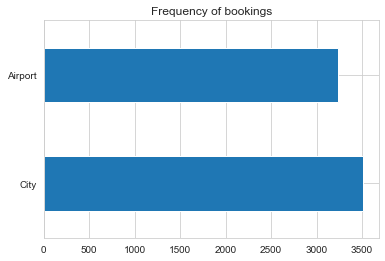

In [198]:
d1=df['Pickup point'].value_counts()
d1.plot.barh()
plt.title('Frequency of bookings')

- we can see that there are more booking being made in city compared to airport but when u actually compare airport and city according to population u find the bookings you get from airport are more.  

In [199]:
import cufflinks as cf
cf.go_offline()
df['time_of_booking'].iplot(kind='hist',color='green')

- represents the number of bookings that took place in particular interval of time.

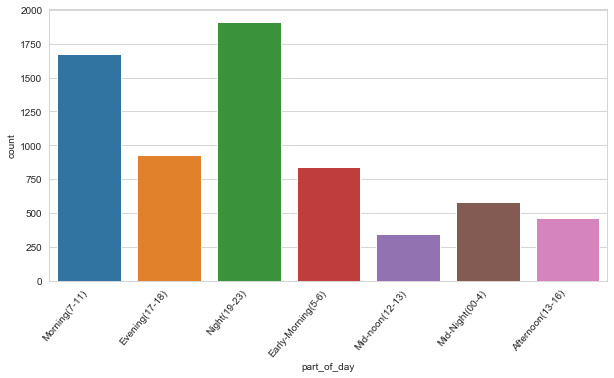

In [200]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='part_of_day',data=df,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
plt.show()

- we see that there are more bookings being made duirng night i.e, between 7pm to 11pm followed by morning between 7am to 11am.
- lowest during midnoon between 12pm to 1pm

Text(0.5, 1.0, 'Status of cab supply')

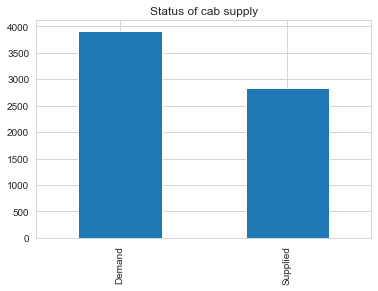

In [201]:
d2=df['Status_of_cab_supply'].value_counts()
d2.plot.bar()
plt.title('Status of cab supply')

- There is a huge demand when compared to supply of cabs

Text(0.5, 1.0, 'Status of cabs')

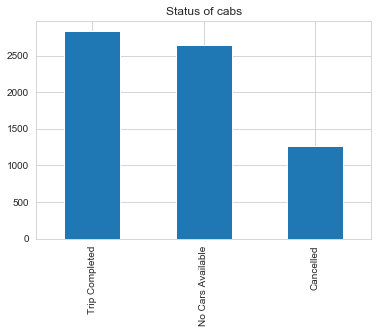

In [202]:
d3=df['Status'].value_counts()
d3.plot.bar()
plt.title('Status of cabs')

- The amount of trips completed is almost equal to no availability of cars

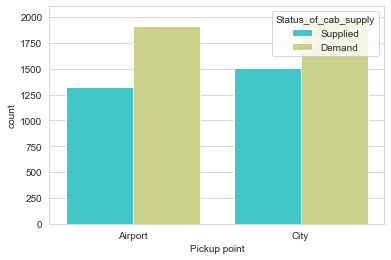

In [203]:
sns.set_style('whitegrid')
sns.countplot(x='Pickup point',hue='Status_of_cab_supply',data=df,palette='rainbow')

- we can see that the demand for cabs is almost equal in both airport and city but the supply is less in both the cases

In [204]:
#We will write a fuction that returns percentage of suppply and demand in airport and city

def percentage_supply_demand(x):
    d=df[(df['Pickup point']==x) & (df['Status_of_cab_supply']=='Supplied')].shape
    d1=df[(df['Pickup point']==x) & (df['Status_of_cab_supply']=='Demand')].shape
    a=d[0]
    g=d1[0]
    f=df['Pickup point'].value_counts()
    if x=='Airport':
        b=f[1]
    else:
        b=f[0]
    percent=(a/b)*100
    percent1=(g/b)*100
    e=print("The % of supply of cabs in {} is {}, when there is a demand of {}".format(x,percent,percent1))
    return e

In [205]:
percentage_supply_demand('Airport')

The % of supply of cabs in Airport is 40.98208770846201, when there is a demand of 59.01791229153799


In [206]:
percentage_supply_demand('City')

The % of supply of cabs in City is 42.88565725691475, when there is a demand of 57.11434274308525


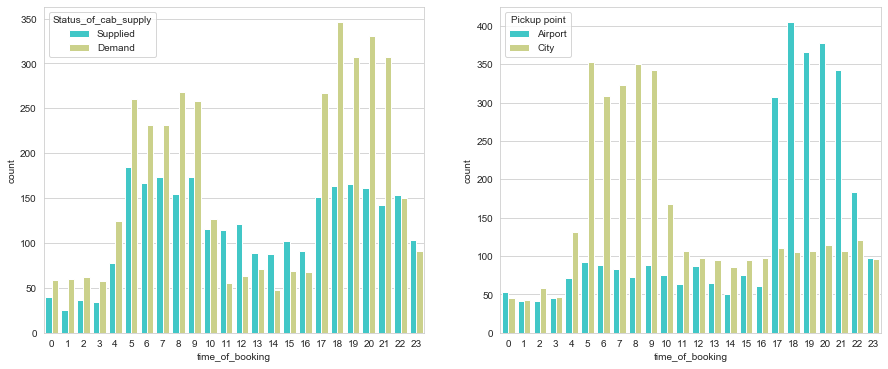

In [213]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
plt.subplot(1,2,1)
sns.countplot(x='time_of_booking',hue='Status_of_cab_supply',data=df,palette='rainbow')
plt.subplot(1,2,2)
sns.countplot(x='time_of_booking',hue='Pickup point',data=df,palette='rainbow')
plt.show()

- From above plot we can say that there is lot of demand for gaps between the timings 6 to 10pm but the supply is too low

- we can see that more bookings from city are being made between 5-9am and 5-9pm in airport

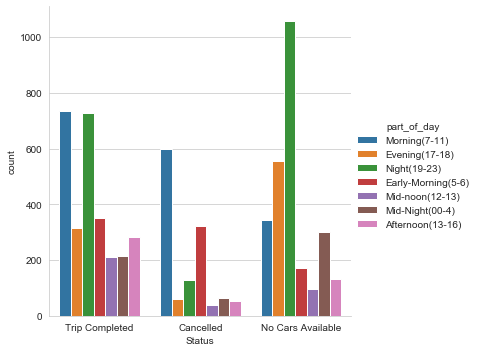

In [210]:
sns.catplot(hue='part_of_day',x='Status',data=df,kind='count')

-  This plot describes about the count of status of trips in different parts of day, there are almost 700 trips completed during morning and nights while most cabs are also cancelled during morning and early mornings

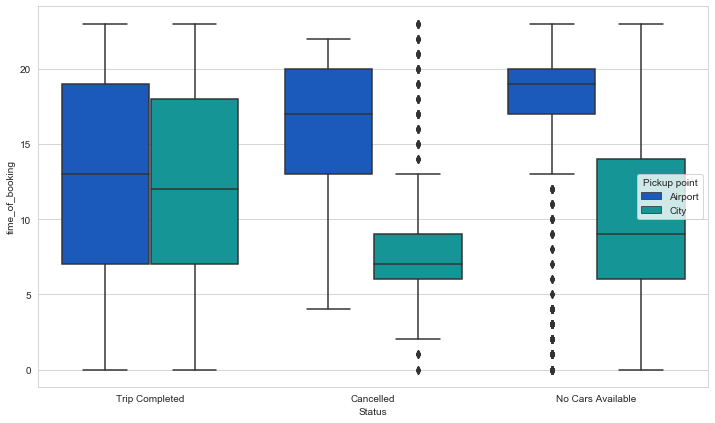

In [211]:
plt.figure(figsize=(12, 7))
sns.boxplot(hue="Pickup point", y="time_of_booking", x="Status",data=df,palette='winter')

- From above visulization we can clearly see that more number of cars are not available between 7am to 2pm in city and in airport between 5pm to 8pm
- No. of cancelled cabs in city are happening during 6 to 9 am and in airport between 1 to 8 pm

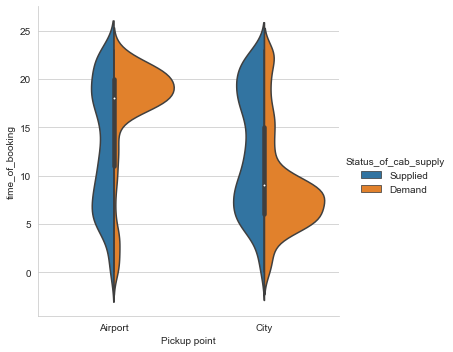

In [212]:
sns.catplot(x="Pickup point", y="time_of_booking", hue="Status_of_cab_supply",split=True, kind="violin", data=df)
plt.show()

- From above plot we can clearly state that there is a inverse relation between airport and city, during the time interval 4 to 9 am there is more demand in city while the supply is too low, now when you look at airport the supply during this time frame is high while demand is low.
- And similarly there is more demand in airport between 4pm and 11pm while supply is low,in city during this time interval there is more supply and less demand.

# Conclusion

- From above visualizations in order to get a solution for supply-demand gap, one thing we can do is that we can assist few cab drivers to move towards airport from city during 4pm to 11pm timings as there is more demand and less supply in airport and less demand and more supply in city during that time frame.
- similarly during 4 am to 9 am there is more demand in city than airport and hence we can assist some cab drivers to go towards city during that time interval in order to meet the demand rather than waiting at airport where demand is less and supply is more.
- This way we can reduce the supply-demand gap and which eventually is profitable to both coustmer and company.